# Análisis de Redes Sociales: Festival de Eurovisión

**Integrantes:** Araceli Pérez Buendía. Sofía Maceín Sanz

Bibliografía básica: https://www.kaggle.com/code/jeleandro/network-analysis-applied-to-eurovision

## Índice

1. Introducción
2. Resumen y objetivos
3. Análisis exploratorio de los datos

### 1. Introducción

### 2. Resumen y objetivos

### 3. Análisis exploratorio de los datos

Antes de comenzar, haremos una exploración previa de los datos por si fuera mecesario hacer modificaciones o transformaciones.

####  Paquetes y librerías

In [1]:
# Paquetes y librerias
import numpy as np 
import pandas as pd 
import pylab as plt
import seaborn as sns
import pprint
from IPython.display import HTML

%matplotlib inline
sns.set_style('whitegrid')

#### 3.1. Carga de los datos y preliminares

En primer lugar, cargamos los datos y miramos la dimensión y la estructura.

In [2]:
# Dataset de eurovision
df = pd.read_excel('eurovision_1975_2019.xlsx')
df.columns = ['year','final','edition','votetype','countryfrom','countryto','points','duplicate'];

# Visualizacion dataset
df.sample(5)

year final  edition votetype     countryfrom       countryto  points  \
48335  2019   sf1  2019sf1        J  Czech Republic         Iceland       0   
38111  2016   sf1  2016sf1        T          Sweden         Finland       6   
47444  2019     f    2019f        T          Norway  United Kingdom       0   
49166  2019     f    2019f        J          Norway           Italy       3   
799    1977     f    1977f        J         Ireland         Ireland       0   

      duplicate  
48335       NaN  
38111       NaN  
47444       NaN  
49166       NaN  
799           x

In [3]:
# Dimension de los datos
df.shape

(49832, 8)

Tenemos 49832 registros de 8 variables.

In [4]:
# Valores de las columnas
for col in df.columns:
    print(col, ': ', sorted(df[col].dropna().unique()), '\n')

year :  [1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] 

final :  ['f', 'sf', 'sf1', 'sf2'] 

edition :  ['1975f', '1976f', '1977f', '1978f', '1979f', '1980f', '1981f', '1982f', '1983f', '1984f', '1985f', '1986f', '1987f', '1988f', '1989f', '1990f', '1991f', '1992f', '1993f', '1994f', '1995f', '1996f', '1997f', '1998f', '1999f', '2000f', '2001f', '2002f', '2003f', '2004f', '2004sf', '2005f', '2005sf', '2006f', '2006sf', '2007f', '2007sf', '2008f', '2008sf1', '2008sf2', '2009f', '2009sf1', '2009sf2', '2010f', '2010sf1', '2010sf2', '2011f', '2011sf1', '2011sf2', '2012f', '2012sf1', '2012sf2', '2013f', '2013sf1', '2013sf2', '2014f', '2014sf1', '2014sf2', '2015f', '2015sf1', '2015sf2', '2016f', '2016sf1', '2016sf2', '2017f', '2017sf1', '2017sf2', '2018f', '2018sf1', '20

In [5]:
df.sample(5)

year final  edition votetype     countryfrom       countryto  points  \
6721   1991     f    1991f        J  United Kingdom           Italy       0   
45729  2018   sf2  2018sf2        J         Hungary          Serbia       6   
15992  2005     f    2005f        J          Norway         Hungary       0   
45029  2018   sf1  2018sf1        J           Spain         Estonia       6   
43937  2018     f    2018f        T  Czech Republic  Czech Republic       0   

      duplicate  
6721        NaN  
45729       NaN  
15992       NaN  
45029       NaN  
43937         x

Las variables del dataset son las siguientes:

*   ***year*** : Representa el año en que ocurrió el concurso. Los valores varían desde 1975 hasta 2019.
*   ***final*** : Indica si el registro corresponde a la final o a una de las semifinales del concurso.
*   ***edition*** : Representa la edición específica del evento de Eurovisión, indicada por el año y el tipo de ronda (final o semifinal).
*   ***votetype*** : Indica el tipo de voto utilizado en el evento, donde "J" representa el voto del jurado y "T" representa el televoto.
*   ***countryfrom*** : Indica el país de origen del voto.
*   ***countryto*** : Indica el país al que se dirige el voto.
*   ***points*** : Representa la cantidad de puntos asignados por un país a otro durante el proceso de votación. Los valores pueden variar entre 0 y 12.
*   ***duplicate*** : Esta variable marca con "x" aquellas filas donde el país de origen y el país de destino son iguales.

Vemos el tipo de variables y si existen valores nulos.

In [6]:
# Tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49832 entries, 0 to 49831
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         49832 non-null  int64 
 1   final        49832 non-null  object
 2   edition      49832 non-null  object
 3   votetype     49832 non-null  object
 4   countryfrom  49832 non-null  object
 5   countryto    49832 non-null  object
 6   points       49832 non-null  int64 
 7   duplicate    1528 non-null   object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


A continuación,

* Eliminamos del dataset los países que no están conectados dado un año, es decir, aquellos con puntuación `points` $ = 0$.
* Eliminamos las entradas marcadas como duplicadas, `duplicates` = 'x', que corresponenden a la unión del país consigo mismo.
* Renombramos algunos países para mayor facilidad
* Como para la construcción de la red final se tendrá en cuenta las ediciones a partir del año 2000, debido la incorporacion del televoto y la estabilidad política de los países, vamos a considerar los votos de Yugoslavia en sus correspondendientes estados actuales tras la disolución en 1992 (Bosnia y Herzegovina, Croacia, Eslovenia, Macedonia del Norte, Montenegro, Serbia, Kosovo).
* Eliminamos aquellos países con una baja participación, en particular, menor a 5 años o que no haya participado en los úlitmos 8 años.

Para todo esto, definimos una función `basicClean` en la que aplicamos los procedimientos explicados.

In [7]:
def basicClean(df, minYears = 5, last_participation = 8):

    # 1. ELiminamos puntuaciones de 0
    df2 = df.copy().query('points > 0')

    # 2. Eliminamos duplicados
    # Convertimos los valores 'x' a True y el resto a False
    df2['duplicate'] = df2['duplicate'].apply(lambda x: True if x == 'x' or x == True else False)
    # Nos quedamos con las filas en las que duplicate toma el valor False
    df2 = df2.query('duplicate == False').drop(columns=['duplicate'])


    # 3. Renombramos paises
    def applyRename(x):
        # Creamos un diccionario con los paises a renombrar
        renamings = {
            'North Macedonia': 'Macedonia',
            'F.Y.R. Macedonia': 'Macedonia',
            'The Netherands': 'Netherlands', # debido a un error en los datos
            'The Netherlands': 'Netherlands',
            'Bosnia & Herzegovina': 'Bosnia'}
        # Si el pais esta entre los paises del diccionario, cambiamos el nombre;
        # en caso contrario se devuelve el mismo nombre
        return renamings[x] if x in renamings else x

    # Aplicamos la funcion a las columnas con ls paises
    df2['countryfrom'] = df2['countryfrom'].apply(applyRename)
    df2['countryto']   = df2['countryto'].apply(applyRename)


    # 4. Division de Yugoslavia y Serbia & Montenegro a sus estados en la actualidad
    division = {
        'Yugoslavia': ['Macedonia', 'Serbia', 'Montenegro', 'Slovenia', 'Bosnia','Croatia'],
        'Serbia & Montenegro': ['Serbia', 'Montenegro']}

    df2['countryfrom'] = df2['countryfrom'].apply(lambda x:division[x] if x in division else x)
    df2['countryto']   = df2['countryto'].apply(lambda x:division[x] if x in division else x)

    df2 = df2.explode('countryfrom').explode('countryto')
    # Cada cambio que involucre a varios paises se desglosa entre los
    # pares de paises correspondientess


    # 5. Eliminamos aquellos paises que hayan participado menos 5 veces
    # y que no han estado activos en los ultimos 5 años

    # Calculamos numero de años participados y cuantos años han pasado desde
    # utlima participacion
    toKeep = df2.groupby('countryfrom').apply(lambda x:pd.Series(
        {'years': x['year'].nunique(),
        'last_participation': df2['year'].max() - x['year'].max()
    })).query(f'years >= {minYears} and last_participation <= {last_participation}').reset_index()['countryfrom']
    # Asi obtenemos la lista de paises que cumplen los requisitos

    # Mostramos los paises que no cumplen los requisitos
    display(HTML("<p>ignored countries: %s</p>" %', '.join(df2[df2['countryfrom'].isin(toKeep)==False]['countryfrom'].unique())))

    df2 = df2[df2['countryfrom'].isin(toKeep)]
    df2 = df2[df2['countryto'].isin(toKeep)]



    # 6. Tomamos los puntos unicamente de la final
    df2['finalcode'] = df2.final.map({'f':1, 'sf':2,'sf1':2,'sf2':2})
    temp1 = df2.groupby(['countryto','year']).agg({'finalcode':'min'});
    df2 = pd.merge(df2,temp1, on=['countryto','year','finalcode'], how='inner')

    assert len(df2.groupby(['countryfrom','countryto','year']).agg({'final':'nunique'}).query('final >1')) == 0

    df2.drop(columns=['finalcode','edition'], inplace=True)

    return df2.reindex()

In [8]:
# Aplicamos la funcion al dataset original
df2 = basicClean(df)

# Dimnesion del nuevo dataset
print('Dimension del nuevo dataset: ', df2.shape, '\n')

# Visualizacion del dataset
df2.sample(5)

Dimension del nuevo dataset:  (17199, 6) 



year final votetype countryfrom    countryto  points
11978  2013     f        J     Hungary      Armenia       3
522    1977     f        J    Portugal  Switzerland       4
13077  2016     f        J     Armenia    Australia       5
12584  2015     f        J     Albania    Australia       3
2866   1988     f        J     Germany       France       3

Ahora tenemos un dataset con 17199 registros y 6 variables.

#### 3.2. Análisis exploratorio de los datos

El objetivo de esta sección es estudiar la posible distribución subyecente de los datos, así como posibles outliers o valores atípicos. Con ello, pretendemos crear una red que recoja la información básica del concurso a lo largo de los años para dar respuesta a las preguntas planteadas.

In [10]:
# Dataset
df2.sample(5)

year final votetype countryfrom countryto  points
15984 2018-01-01     f        T      Israel   Denmark       4
9651  2009-01-01     f        J     Croatia   Iceland       2
12965 2015-01-01     f        J     Germany   Hungary       1
9537  2008-01-01   sf2        J      Serbia   Hungary       4
6956  2003-01-01     f        J      Norway   Ireland       6

**1) Participación a lo largo de los años:** Gráfico del número de puntos totales que se han dado a lo largo de los años en la categoría de final. Tratamos de comprender el crecimiento de Eurovisión y el interés de los países a lo largo del tiempo.

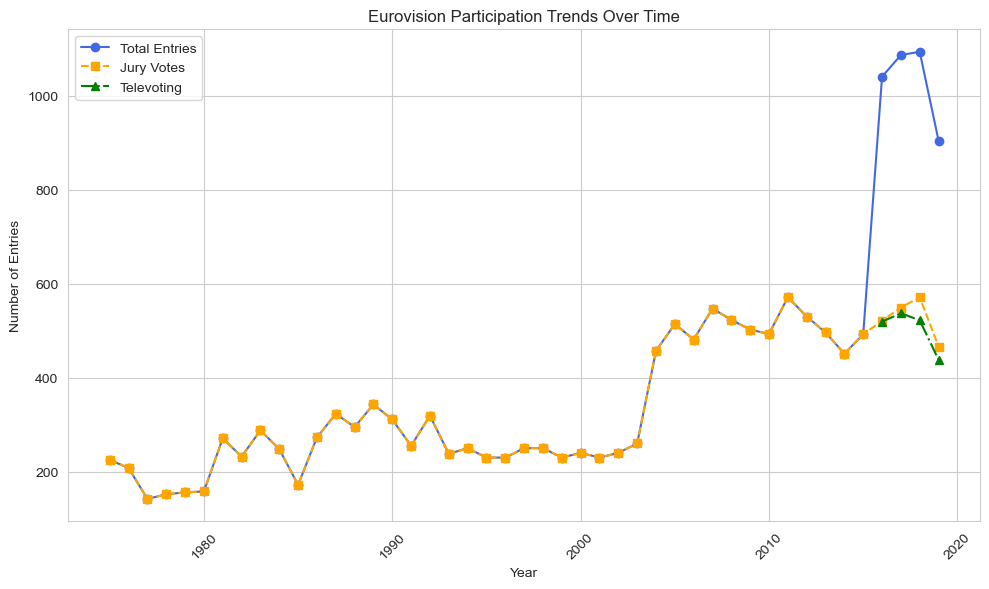

In [9]:
# Convertimos la columna 'year' a formato datetime
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Agrupamos por año y contamos el número de entradas
participation_counts_total = df2.groupby(df2['year'].dt.year).size() # totales
participation_counts_J = df2[df2['votetype'] == 'J'].groupby(df2['year'].dt.year).size() # jurado
participation_counts_T = df2[df2['votetype'] == 'T'].groupby(df2['year'].dt.year).size() # televoto

# Grafico de las tendencias de participación
plt.figure(figsize=(10, 6))

participation_counts_total.plot(marker='o', color='royalblue', linestyle='-', label='Total Entries')
participation_counts_J.plot(marker='s', color='orange', linestyle='--', label='Jury Votes')
participation_counts_T.plot(marker='^', color='green', linestyle='-.', label='Televoting')

plt.title('Eurovision Participation Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Breve explicación del aumento de votos:

* 1997-2008: Televoto
* 2009-2015: Sistema Mixto
* 2016 - Televoto(app)

Podemos observar que a partir de principios de la década de los 2000 hay un aumento significativo en la participación.

**2) Distribución de puntos por país:** Histograma que visualiza la distribución de puntos recibidos por cada país. Esto puede proporcionar información sobre la equidad y consistencia del proceso de votación.

<Figure size 1200x800 with 0 Axes>

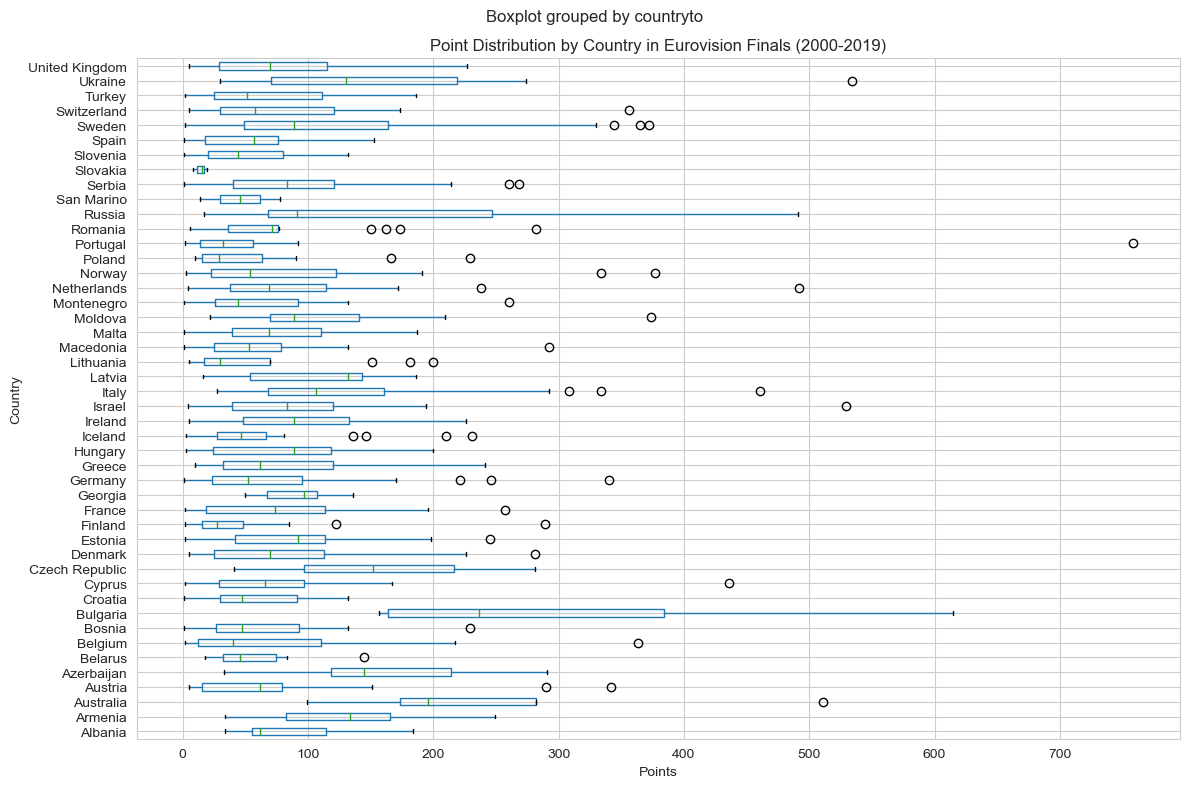

In [11]:
# Categoria de final (f)
df_final = df2[df2['final'] == 'f']
points_by_country_year = df_final.groupby(['countryto', df_final['year'].dt.year])['points'].sum().reset_index()

# Grafico boxplot
plt.figure(figsize=(12, 8))
boxplot = points_by_country_year.boxplot(column='points', by='countryto', vert=False, figsize=(12,8))

plt.title('Point Distribution by Country in Eurovision Finals (2000-2019)')
plt.xlabel('Points')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

En algunos países se observa una variabilidad considerable en la cantidad de puntos recibidos a lo largo de los años. Lo que significa que algunos años han sido más favoralbes en términos de puntuación recibida, y otros años menos favorables.

**3) Mapa de calor del intercambio de puntos:** Tratamos de ver patrones de alianzas/amistades entre países e identificar grupos de países que a menudo se votan entre sí.

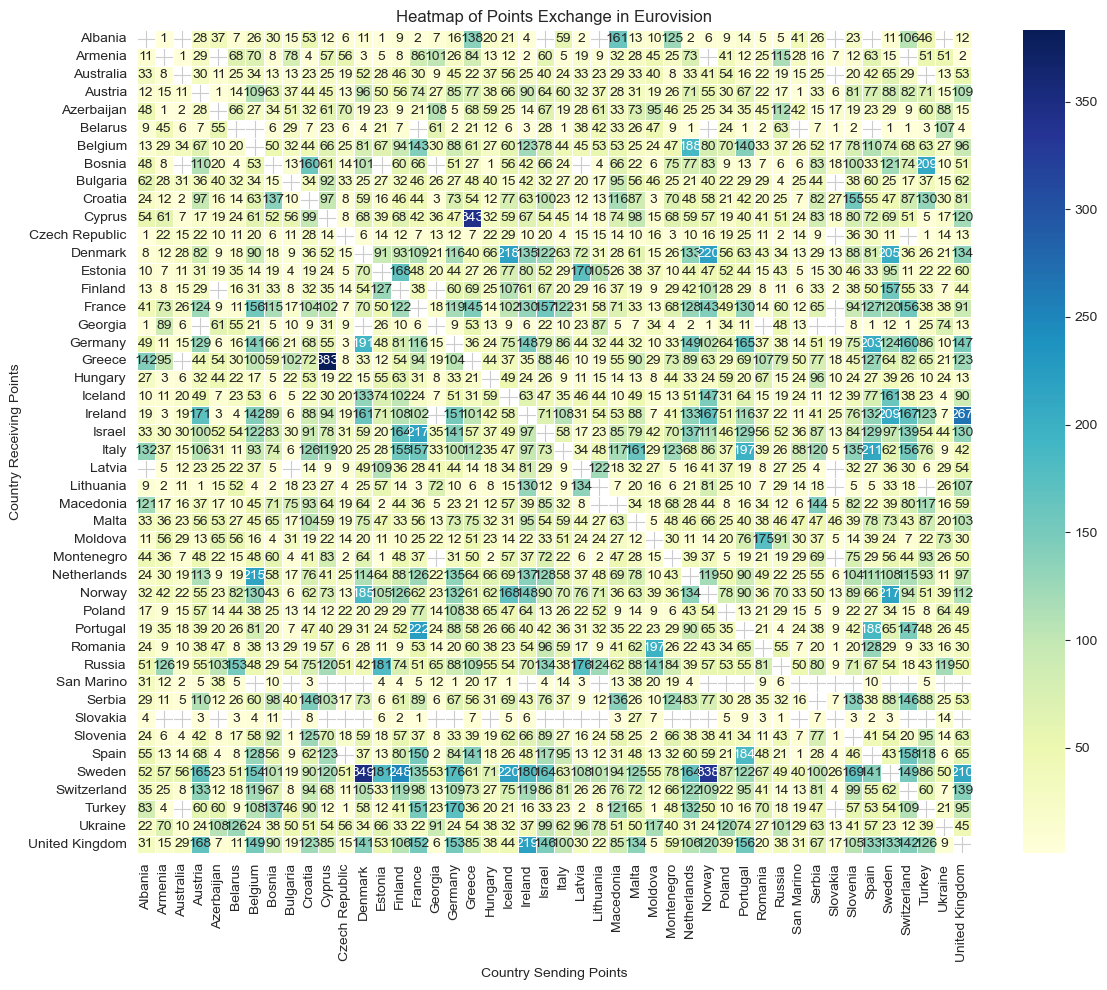

In [12]:
# Intercambio de puntos
points_matrix = df2.pivot_table(index='countryto', columns='countryfrom', values='points', aggfunc='sum')

# Grafico
plt.figure(figsize=(12, 10))
sns.heatmap(points_matrix, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Points Exchange in Eurovision')
plt.xlabel('Country Sending Points')
plt.ylabel('Country Receiving Points')
plt.tight_layout()
plt.show()

Se observan correlaciones positivas significativas entre ciertos países, como Serbia y Bosnia, y España y Portugal, lo que sugiere una tendencia a votarse mutuamente.

Hay grupos de países con correlaciones positivas entre ellos, como los países de los Balcanes (Serbia, Bosnia, Montenegro y Macedonia) y los países escandinavos (Suecia, Noruega y Dinamarca), lo que indica posibles patrones regionales o culturales en la votación.

**4) Resumen de la participación por país en el concurso de Eurovisión**: incluyendo el número de años únicos en los que un país participó, el año más temprano de participación, el año más reciente de participación y el porcentaje de presencia, que representa la proporción de años en los que el país participó en relación con el número total de años disponibles.

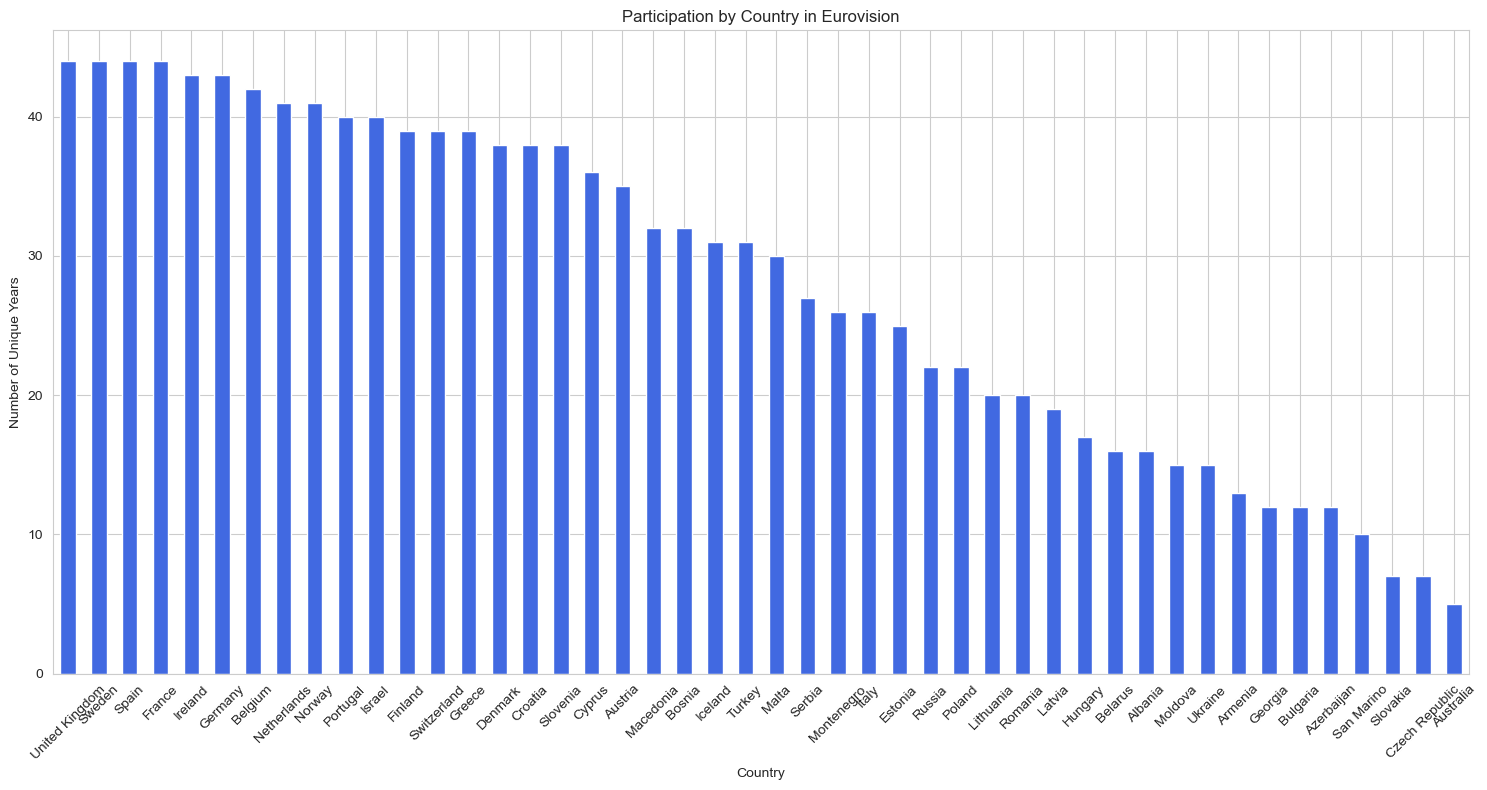

In [13]:
# Generate the summary of participation by country
participation_summary = df2.groupby(['countryto']).apply(lambda x: pd.Series({
    'nyear': x['year'].nunique(),
    'min_year': x['year'].min().year,
    'max_year': x['year'].max().year,
    'presence': int(100 * x['year'].nunique() / (x['year'].max().year - x['year'].min().year + 1))
}))

# Sort the summary by the number of unique years in descending order
participation_summary_sorted = participation_summary.sort_values('nyear', ascending=False)# Plot the participation by country as a bar chart
plt.figure(figsize=(15, 8))
participation_summary_sorted['nyear'].plot(kind='bar', color='royalblue')
plt.title('Participation by Country in Eurovision')
plt.xlabel('Country')
plt.ylabel('Number of Unique Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que algunos países, como Reino Unido, Suecia, España y Francia, han participado en casi todas las ediciones del concurso desde que comenzó en 1975.

Otros países, como Australia, han participado en un número menor de ediciones debido a su incorporación más reciente al concurso. Sin embargo, su tasa de presencia es del 100% en las ediciones en las que han participado.

Algunos países han disminuido su participación a lo largo de los años, como Turquía, que dejó de participar después de 2012, y Bosnia, que dejó de participar después de 2016. Esto puede deberse a varias razones, como cambios en las políticas de participación o problemas financieros.

**Winners**

In [14]:
#The Winner
df2.query('final =="f"')\
    .groupby(['countryto','year']).agg({'points':'sum'}).reset_index()\
    .groupby('year').apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
    .sort_values('year',ascending=False)\
    .head(12).T.style.set_caption("The Winners").hide_index()\
    #.bar(subset=['points'], color='#d65f5f')

C:\Users\sofia\AppData\Local\Temp\ipykernel_4512\2000270484.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .head(12).T.style.set_caption("The Winners").hide_index()\


**Frecuencia con la que cada país aparece en la lista de los mejores países de Eurovisión en función de la cantidad de puntos recibidos en cada año y el número de posiciones superiores**

In [15]:
def atTop(df,tops):
    #points received
    df= df.groupby(['countryto','year']).agg({'points':'sum'}).reset_index().groupby('year')

    #top1 (country with most of points)
    top = df.apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
        .groupby('countryto').agg({'year':'nunique'}).rename(columns={'year':'years_on_top'}).reset_index()

    #the other tops
    for t in tops:
        temp = df.apply(lambda x:x.sort_values('points').tail(t)).reset_index(drop=True)\
            .groupby('countryto').agg({'year':'nunique'})\
            .rename(columns={'year':f'years_on_top_{t}'}).reset_index()
        top = pd.merge(top,temp, on='countryto',how='outer')

    top = top.fillna(0);
    floatcols = top.columns[top.dtypes == 'float64']
    top[floatcols] = top[floatcols].astype(int)

    return top

In [ ]:
dfAtTop = atTop(df2.query('final =="f"'), tops=[3,5,7,10])
dfAtTop.sort_values(['years_on_top','years_on_top_3'], ascending=[False,False]).head(20)\
    .style.bar(subset=['years_on_top','years_on_top_3','years_on_top_5','years_on_top_7','years_on_top_10'],
               color='#cccccc')

Vemos que países como Suecia, Irlanda, Noruega y Dinamarca tienen una presencia notable en las posiciones superiores, lo que sugiere un dominio continuo en el concurso de Eurovisión.

Países como Israel, Francia, Alemania y Ucrania muestran una presencia intermitente en las posiciones superiores, lo que indica un éxito variable a lo largo de los años.

La mayoría de los países tienen al menos una aparición en las posiciones superiores, lo que sugiere una distribución relativamente equitativa del éxito en Eurovisión entre varios países.

**Preferencias de voto de España hacia diferentes países en el Festival de Eurovisión, desglosadas por los diferentes tipos de votos**:
El jurado puede influir más en el resultado que el público (televoto) y, en muchos casos, es clara la diferencia en sus preferencias.

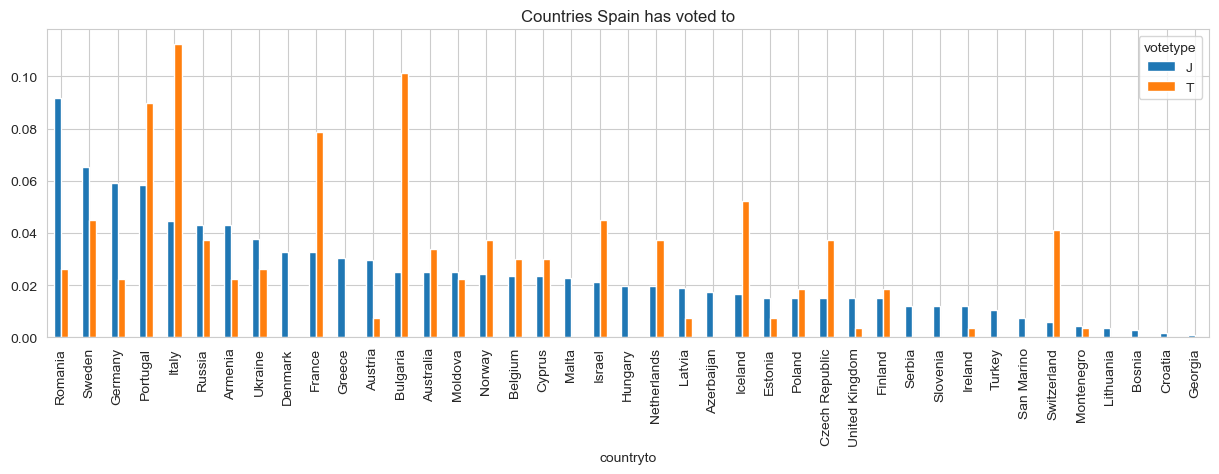

In [16]:
df2 \
    .query('year >= 2000 and countryfrom=="Spain"')\
    .pivot_table(index='countryto',columns='votetype', values='points',aggfunc='sum').fillna(0).sort_values('J',ascending=False)\
    .apply(lambda x: x/x.sum(), axis=0)\
    .plot(kind='bar',stacked=False,figsize=(15,4), title='Countries Spain has voted to');
plt.grid('off')
plt.show();

### 4. Visualización del grafo

In [17]:
# Paquetes y Librerias
import networkx as nx

In [18]:
# Funciones de selecciones de porcentaje
def selectTopN(x, column, top=3):
    x = x.sort_values(column, ascending=False).head(top)
    return x

def selectTopPercent(x, column, percent=0.2, retrieve_first=True):
    x = x.sort_values(column, ascending=False)
    cut = x[column].cumsum() / x[column].sum()
    cut = cut <= percent

    # Return at least the first and avoid warnings
    if retrieve_first and cut.sum() == 0:
        return x.iloc[0]

    return x[cut]

Visualizamos, por año en la fase final el grafo resultante de la agregacion de votos y televotos.

In [19]:
def plot_eurovision_graph(df, year, percent=0.3):
    # Agregar el televoto y el voto del jurado
    temp = df2.groupby(['year', 'final', 'countryfrom', 'countryto']).agg({'points':'sum'})\
    .reset_index().rename(columns={'points':'weight'})

    # Seleccion de fase final de un año
    df_year = temp[(temp['year'].dt.year == year) & (temp['final'] == 'f')]

    # Crear el grafo original con todas las conexiones
    G = nx.from_pandas_edgelist(df_year, 'countryfrom', 'countryto', ['weight'], create_using=nx.DiGraph)
    pos1 = nx.circular_layout(G) #layout del primer grafo

    # Crear el segundo grafo con el porcentaje de los pesos mas altos
    selected_edges = selectTopPercent(df_year, 'weight', percent=percent)
    G2 = nx.from_pandas_edgelist(selected_edges, 'countryfrom', 'countryto', ['weight'], create_using=nx.DiGraph)
    pos2 = nx.kamada_kawai_layout(G2, weight='weight') # layout del segundo grafo

    # Graficos
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Grafo original
    nx.draw(G, pos1, ax=axs[0], with_labels=True, node_color=list(nx.pagerank(G).values()),
            cmap=plt.cm.viridis_r, edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
    axs[0].set_title(f'Directed Graph of Points Exchange in Eurovision {year} (Original)')
    axs[0].axis('off')

    # Grafo con el porcentaje seleccionado
    nx.draw(G2, pos2, ax=axs[1], with_labels=True, node_color=list(nx.pagerank(G2).values()),
            cmap=plt.cm.viridis_r, edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
    axs[1].set_title(f'Directed Graph of Points Exchange in Eurovision {year} (30% of Edge Weight)')
    axs[1].axis('off')


    plt.tight_layout()
    plt.show()

    return df_year, selected_edges, G, G2

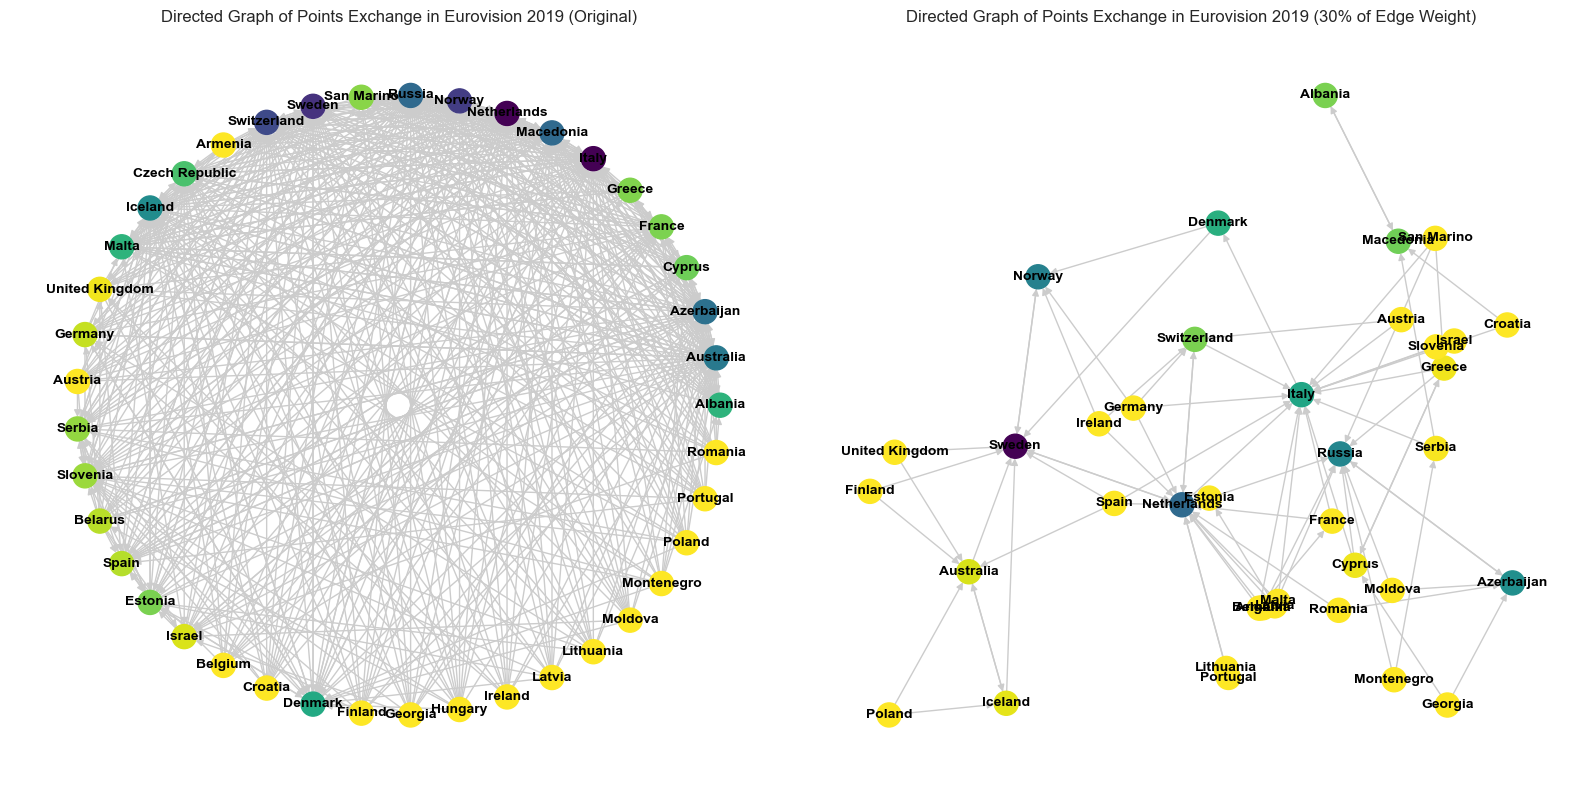

(            year final     countryfrom    countryto  weight
 15492 2019-01-01     f         Albania    Australia       2
 15493 2019-01-01     f         Albania   Azerbaijan      11
 15494 2019-01-01     f         Albania       Cyprus       7
 15495 2019-01-01     f         Albania       France       3
 15496 2019-01-01     f         Albania       Greece       6
 ...          ...   ...             ...          ...     ...
 16023 2019-01-01     f  United Kingdom       Norway      12
 16024 2019-01-01     f  United Kingdom       Russia       4
 16025 2019-01-01     f  United Kingdom        Spain       2
 16026 2019-01-01     f  United Kingdom       Sweden      15
 16027 2019-01-01     f  United Kingdom  Switzerland      12
 
 [536 rows x 5 columns],
             year final     countryfrom    countryto  weight
 15588 2019-01-01     f         Croatia        Italy      24
 15958 2019-01-01     f          Serbia    Macedonia      24
 15553 2019-01-01     f      Azerbaijan       Russia      

In [20]:
# Final 2019
plot_eurovision_graph(df2, 2019, percent=0.3)

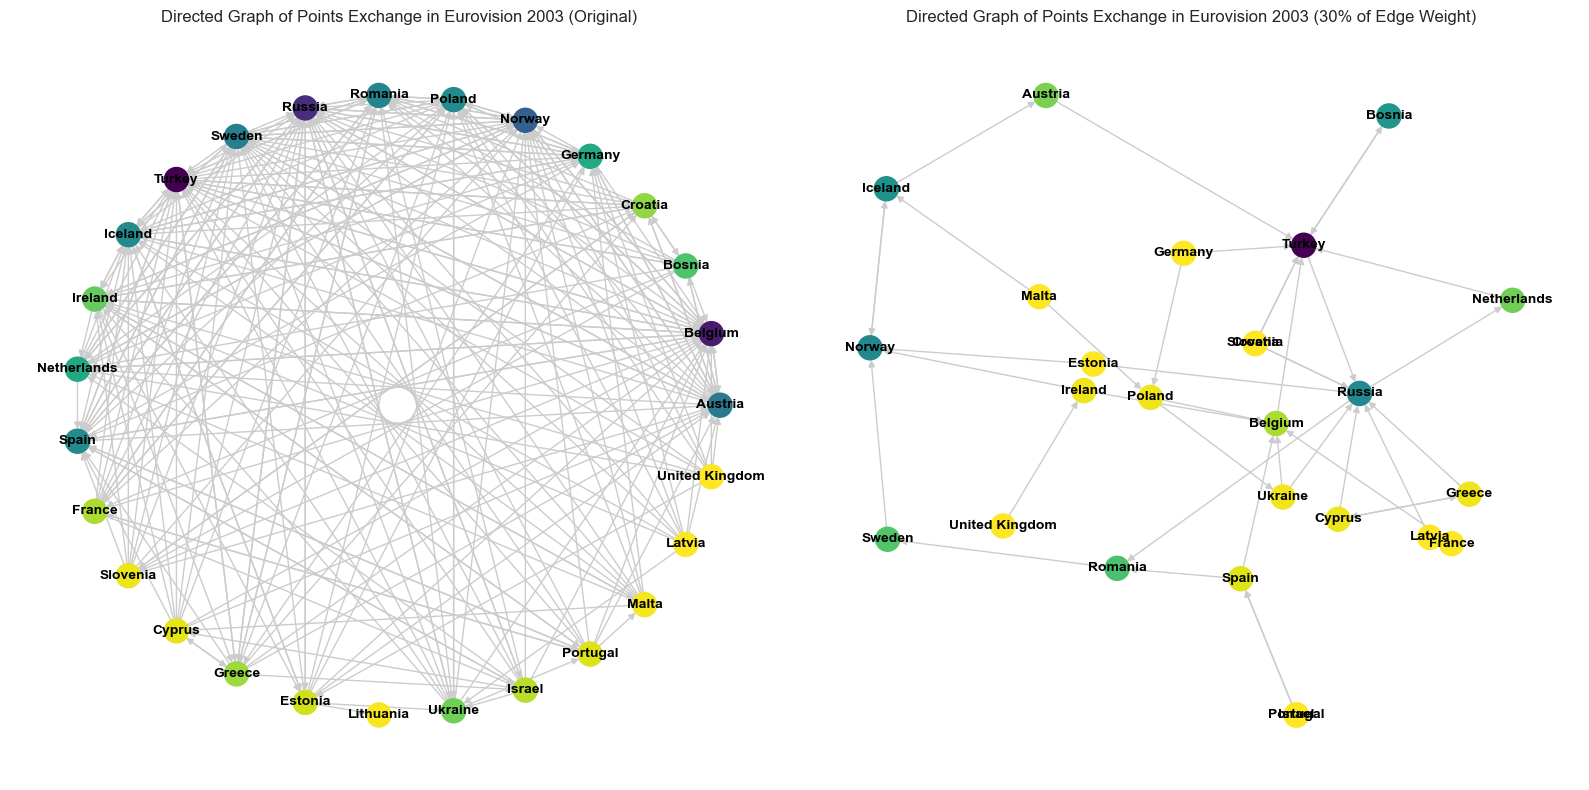

(           year final     countryfrom    countryto  weight
 6759 2003-01-01     f         Austria      Belgium       4
 6760 2003-01-01     f         Austria       Bosnia       7
 6761 2003-01-01     f         Austria      Croatia       5
 6762 2003-01-01     f         Austria      Germany       1
 6763 2003-01-01     f         Austria       Norway       2
 ...         ...   ...             ...          ...     ...
 7014 2003-01-01     f  United Kingdom  Netherlands       1
 7015 2003-01-01     f  United Kingdom       Norway       6
 7016 2003-01-01     f  United Kingdom       Poland       2
 7017 2003-01-01     f  United Kingdom       Sweden      10
 7018 2003-01-01     f  United Kingdom       Turkey       7
 
 [260 rows x 5 columns],
            year final     countryfrom    countryto  weight
 6842 2003-01-01     f          Greece       Cyprus      12
 6778 2003-01-01     f         Belgium       Turkey      12
 6956 2003-01-01     f          Russia      Romania      12
 6867 2003-01

In [21]:
# Final 2003
plot_eurovision_graph(df2, 2003, percent=0.3)

### 5. Explorción de estructuras subyacentes del grafo

**Ideas:**
1. Estático
- **Métricas para un año en concreto/lapso de tiempo:** Explora métricas como la centralidad de intermediación, la centralidad de cercanía, la centralidad de grado, la transitividad (para triadas), la distribución de grados, la longitud promedio del camino más corto, la clustering coefficient, etc. Estudiar estas métricas te dará una comprensión detallada de la estructura y la dinámica de la red en un año específico o durante un período de tiempo determinado.

- **Comparación con modelos de referencia:** Compara las métricas de tu red con las de modelos de referencia como el modelo de Erdős-Rényi (ER) o el modelo de Barabási-Albert (BA). Esto te ayudará a determinar si tu red exhibe características de redes aleatorias, redes libres de escala u otros tipos de redes.

- **Análisis de estructuras subyacentes:** Investiga las estructuras subyacentes en tu red, como los subgrafos densamente conectados, las comunidades o los patrones de triadas específicos. Identificar estas estructuras puede revelar aspectos interesantes sobre la organización y la función de la red.

2. Dinámico
- **Inferencia:** Utiliza los grafos estáticos anteriores para predecir enlaces en el siguiente año. Puedes emplear métodos de aprendizaje automático, como algoritmos de clasificación o regresión, para predecir la probabilidad de que se forme un enlace entre dos nodos en el próximo período de tiempo.

3. Centradonos en un país (España)
- **Red ego:** Crea una red ego centrada en España y analiza sus propiedades estructurales y dinámicas. Esto te permitirá entender mejor la posición de España dentro de la red más amplia y cómo interactúa con otros países específicamente en el contexto del Eurovisión.


## 1. Estático

### (A) Métricas

In [22]:
# Calcular metricas en forma de funcion
def metricas_red(df, ano):
    # Filtramos el año especifico
    df_ano, edges_ano, G_ano, Gedges_ano= plot_eurovision_graph(df2, ano, percent=0.3)
    
    # Metricas
    metrics = {}
    
    # Numero de nodos y enlaces
    metrics['nodos'] = G_ano.number_of_nodes()
    metrics['enlaces'] = G_ano.number_of_edges()
    
    # Densidad
    metrics['denisdad'] = nx.density(G_ano)
    
    # Grado de todos los nodos
    metrics['grado'] = G_ano.degree()
    # Grado promedio
    metrics['grado_promedio'] = sum(dict(G_ano.degree()).values()) / metrics['nodos']
    
    # Distribucion de grados 
    degree_sequence = [d for n, d in G_ano.degree()]
    degree_counts = nx.degree_histogram(G_ano)
    metrics['degree_distribution'] = degree_counts
    
    # Grafico distribucion de grado
    plt.figure(figsize=(8, 6))
    plt.hist(dict(G_ano.degree()).values())
    plt.title(f'Degree Distribution - Eurovision {ano}')
    plt.show()  
    
    # Caminos en el grafo
    # Componente fuertemente conectada mas grande - COMPONENTE GIGANTE
    largest_component = max(nx.strongly_connected_components(G_ano), key=len)
    metrics['G_largest'] = G_ano.subgraph(largest_component).copy()
    
    # Diametro
    metrics['diameter'] = nx.diameter(metrics['G_largest'])
    
    # Grafico de la componente gigante
    plt.figure(figsize=(8, 6))
    pos = nx.kamada_kawai_layout(metrics['G_largest'])  # You can choose any layout you prefer
    nx.draw(metrics['G_largest'], pos, with_labels=True, node_color='#87CEEB',
            edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
    plt.title(f'Largest Strongly Connected Component - Eurovision {ano}')
    plt.axis('off')
    plt.show()
    
    # Centralidad de intermediacion
    metrics['betweenness_centrality'] = nx.betweenness_centrality(G_ano)

    # Centralidad de cercania
    metrics['closeness_centrality'] = nx.closeness_centrality(G_ano)

    # Centralidad de grado
    metrics['degree_centrality'] = nx.degree_centrality(G_ano)

    # Transitividad
    metrics['transitivity'] = nx.transitivity(G_ano)
    

    # Longitud promedio del camino mas corto
    metrics['average_shortest_path_length'] = nx.average_shortest_path_length(metrics['G_largest'])

    # Coeficiente de clustering
    metrics['clustering_coefficient'] = nx.average_clustering(G_ano)
    
    # Convertir el diccionario de metricas a DataFrame
    df_metricas = pd.DataFrame.from_dict(metrics, orient='index').transpose()
    df_metricas['Año'] = ano
    
    return metrics  

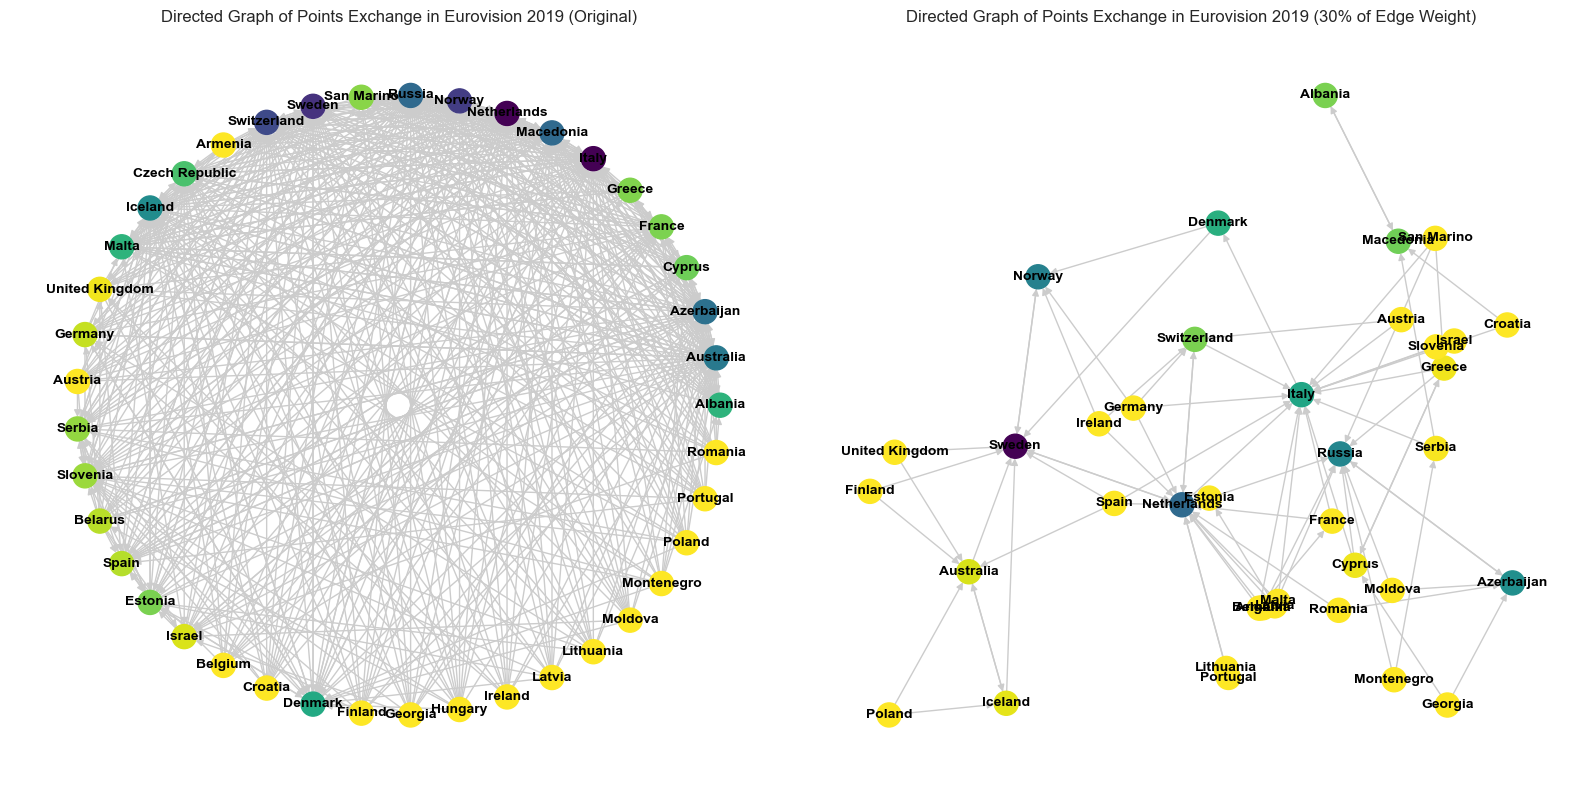

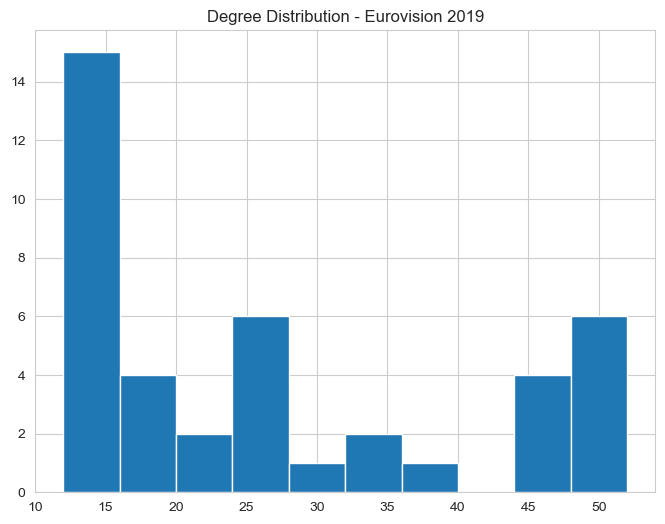

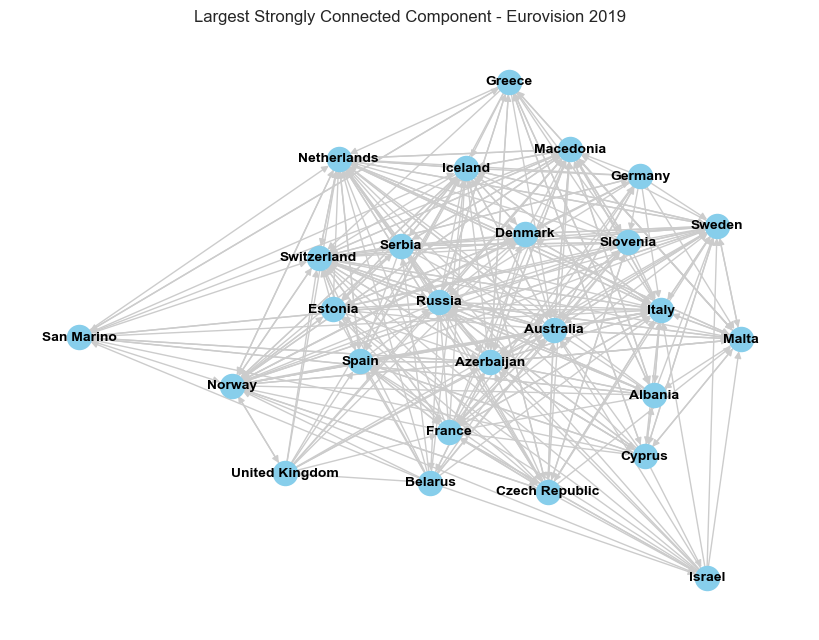

{'G_largest': <networkx.classes.digraph.DiGraph object at 0x0000024962451850>,
 'average_shortest_path_length': 1.4861538461538462,
 'betweenness_centrality': {'Albania': 0.004751693519406071,
                            'Armenia': 0.0,
                            'Australia': 0.016520201009067405,
                            'Austria': 0.0,
                            'Azerbaijan': 0.04448194546119648,
                            'Belarus': 0.004433084066181233,
                            'Belgium': 0.0,
                            'Croatia': 0.0,
                            'Cyprus': 0.009210453148965294,
                            'Czech Republic': 0.014354484921286537,
                            'Denmark': 0.006135395943088251,
                            'Estonia': 0.004167652148421379,
                            'Finland': 0.0,
                            'France': 0.011741417554929696,
                            'Georgia': 0.0,
                            'Germany': 0.00221

In [23]:
# Uso de la función para calcular metricas para el año 2019
metricas_2019 = metricas_red(df2, 2019)
pprint.pprint(metricas_2019)

In [24]:
# DISTRIBUCION DE GRADO
# Tipos de distribucion
def poisson_distribution(k, z):
    return np.exp(-z) * (z**k) / np.math.factorial(k)

def exponential_distribution(k, C, alpha):
    return C * np.exp(-alpha * k)

def power_law_distribution(k, C, gamma):
    return C * (k**(-gamma))

#### Para el año 2019 - Conceptos elementales

* El grafo tiene $n = 41$ nodos y $m = 536$ enlaces. 
* El grado medio: $\frac{2m}{n} = 26.14$
* Densidad: $\rho = \frac{m}{\binom{N}{2}} = 0.3268$; $C(41,2) = 820$
* Distribución de grados: ¿Podría ser de Poisson?
* Componente gigante:
* Diámetro compoennte gigante: 3

La propiedad de **"mundo pequeño"** en las redes se refiere a la idea de que la mayoría de los nodos pueden alcanzarse desde cualquier otro nodo a través de un número relativamente corto de pasos.

Una forma común de medir si una red es un "mundo pequeño" es calcular el coeficiente de clustering y el camino promedio más corto (o longitud media del camino) en la red. Estos son:

1. Coeficiente de Clustering: Mide cuánto tienden a agruparse los nodos vecinos de un nodo en la red. En este caso $0.58$

2. Camino Promedio Más Corto: Es la longitud promedio de los caminos más cortos entre todos los pares de nodos en la red. En este caso,  $1.48$

Luego, la red parece ser mundo pequeño.

### (B) Comparación con modelos de referencia

In [ ]:
# Modelo de Erdős-Rényi (ER)
def generar_red_ER(n, p):
    return nx.erdos_renyi_graph(n, p)

# Modelo de Barabási-Albert (BA)
def generar_red_BA(n, m):
    return nx.barabasi_albert_graph(n, m)

# Función para calcular metricas de red
def calcular_metricas_red(G):
    metrics = {}

    # Calcular las métricas de interés
    metrics['nodos'] = len(G.nodes())
    metrics['enlaces'] = len(G.edges())
    metrics['grado_promedio'] = sum(dict(G.degree()).values()) / metrics['nodos']
    # Agrega más métricas según tus necesidades

    return metrics

In [ ]:
# Generar redes de referencia utilizando los modelos ER y BA
red_ER = generar_red_ER(41, 2*536/(41*(41-1)))
red_BA = generar_red_BA(41,round(2*536/41))

In [ ]:
# Calcular metricas para cada red
metricas_euro = metricas_red(df2, 2019)
metricas_ER = calcular_metricas_red(red_ER)
metricas_BA = calcular_metricas_red(red_BA)

# Imprimir las métricas
print("Métricas de tu red:")
print(metricas_euro)
print("\nMétricas del modelo ER:")
print(metricas_ER)
print("\nMétricas del modelo BA:")
print(metricas_BA)

### (C) Análisis de estructuras subyacentes

2. Red Ego


In [ ]:
# Filtrar los datos para incluir interacciones donde España esté involucrada
spain_df = df2[(df2['countryfrom'] == 'Spain') | (df2['countryto'] == 'Spain')]

Creamos el grafo ego

In [ ]:
import networkx as nx

# Crear un grafo dirigido ego centrado en España
ego_graph = nx.from_pandas_edgelist(spain_df, source='countryfrom', target='countryto', edge_attr='points', create_using=nx.DiGraph())

**Análisis de propiedades estructurales**

Centralidad de intermediación

In [ ]:
betweenness_centrality = nx.betweenness_centrality(ego_graph)
betweenness_centrality

Centralidad de cercanía

In [ ]:
closeness_centrality = nx.closeness_centrality(ego_graph)
closeness_centrality

Centralidad de grado

In [ ]:
degree_centrality = nx.degree_centrality(ego_graph)
degree_centrality

Trasitividad

In [ ]:
transitivity = nx.transitivity(ego_graph)
transitivity

Distribución de grados

In [ ]:
degree_distribution = list(nx.degree_histogram(ego_graph))
degree_distribution

Visualización

In [ ]:
import matplotlib.pyplot as plt

# Visualizar el grafo ego centrado en España
nx.draw(ego_graph, with_labels=True)
plt.show()

In [ ]:
# Crear una red ego centrada en España
def create_ego_network(data, center_country):
    # Filtrar los datos para obtener solo las interacciones relacionadas con el país central
    ego_data = data[(data['countryfrom'] == center_country) | (data['countryto'] == center_country)]

    # Crear un grafo dirigido
    G = nx.DiGraph()

    # Agregar nodos y aristas al grafo
    for idx, row in ego_data.iterrows():
        G.add_edge(row['countryfrom'], row['countryto'], weight=row['points'])

    return G

# Crear la red ego centrada en España
ego_network = create_ego_network(df2, 'Spain')

# Propiedades estructurales
print("Número de nodos en la red ego centrada en España:", ego_network.number_of_nodes())
print("Número de aristas en la red ego centrada en España:", ego_network.number_of_edges())

# Propiedades dinámicas
print("Coeficiente de clustering promedio de la red ego centrada en España:", nx.average_clustering(ego_network))
print("Grado promedio de los nodos en la red ego centrada en España:", sum(dict(ego_network.degree()).values()) / ego_network.number_of_nodes())

# Visualizar la red ego centrada en España
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_network)
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', linewidths=1, font_size=10)
plt.title('Red ego centrada en España')
plt.show()


## Comunidades

Detectar comunidades en una red es fundamental para comprender su estructura y dinámica. El objetivo es separar la res en grupos disjuntos tales que los enlaces que los unan sean menos que los esperados.

**Label Propagation (Propagación de Etiquetas):**
1. *Apuntes*: Se contruyen redes aleatorias con el mismo número de nodos y elaces que la red a estudiar. Se cuenta el número de patrones en las redes. Se calcula el valor de Z para determinar si el número de patrones es significativo.
* Asigna etiquetas aleatorias a los nodos.
* Elige la etiqueta más común en el vecindario de cada nodo.
* Este método tiende a agrupar nodos en comunidades grandes.
* Es muy rápido pero no es la mejor opción para grafos altamente densos.

**Louvain Modularity (Modularidad de Louvain):**
* Asigna nodos a clústeres de manera exhaustiva para maximizar la cantidad de enlaces dentro de cada clúster.
* Produce buenos clústeres y es muy eficiente.
* Es útil para grafos de tamaño mediano a grande.

**Spectral (Espectral):**
* Realiza un Kmeans de la incrustación espectral (vectores y valores propios) de la matriz de Laplacian.
* Está relacionado con los cortes de grafo y es efectivo para detectar comunidades bien definidas.
* Puede ser más costoso computacionalmente que otros métodos, pero puede proporcionar resultados precisos.

### 1. PATRONES (MOTIFS)

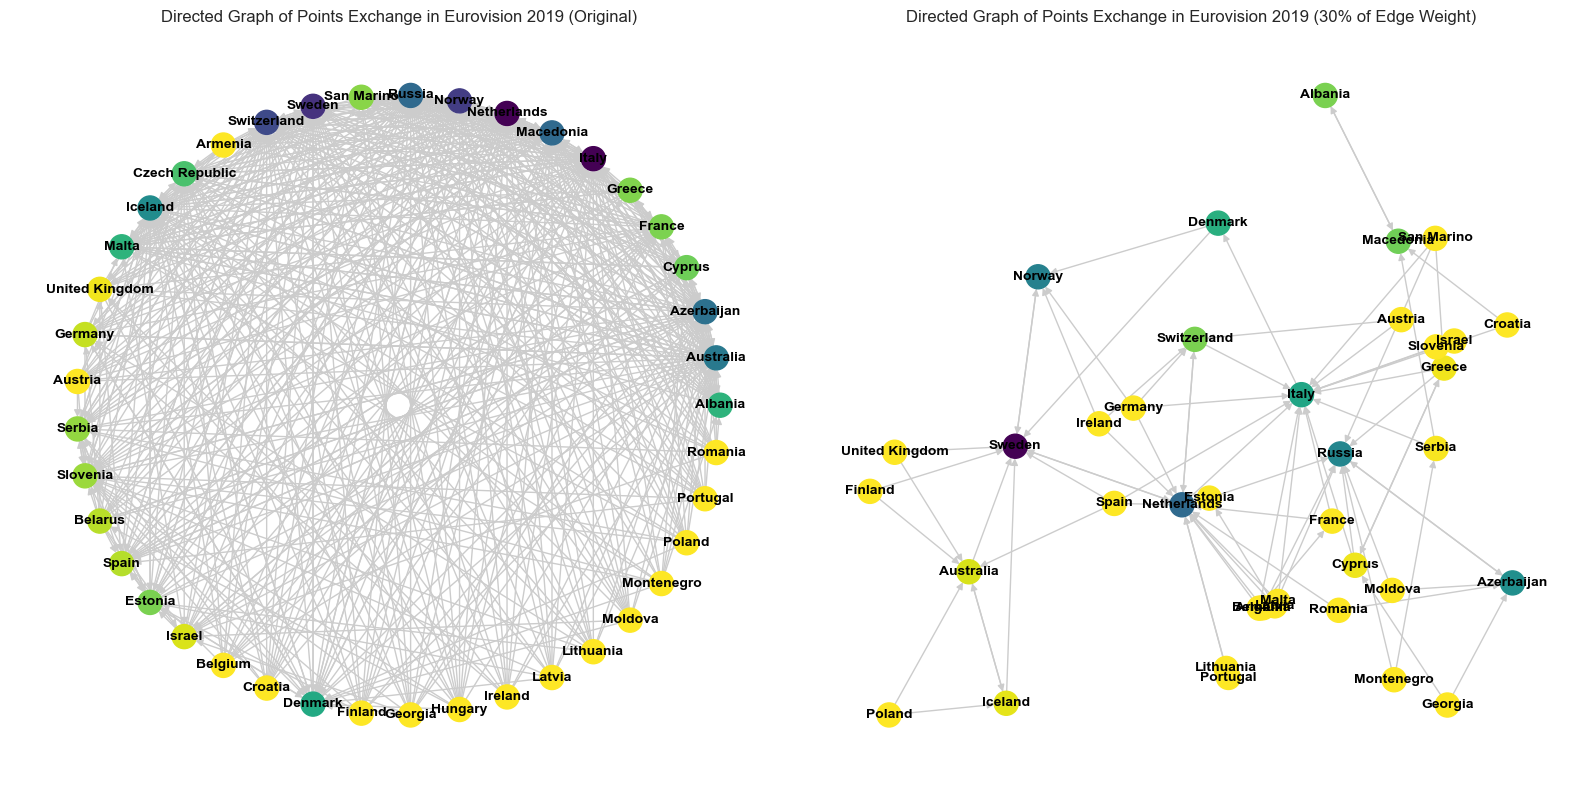

In [25]:
# FINAL 2019
df_19, edges_19, G_19, Gedges_19 = plot_eurovision_graph(df2, 2019, percent=0.3)  

Detección de patrones de 3 nodos

1. **Identificar triangulos:** Puedes usar la función `nx.triangles(G)` de NetworkX para calcular el número de triángulos que cada nodo forma en una red G. Esto te dará un diccionario donde las claves son los nodos y los valores son el número de triángulos en los que participa cada nodo.

In [26]:
# Calcular el numero de triangulos para cada nodo
nx.triangles(G_19.to_undirected()) # Convertir el grafo dirigido en uno no dirigido

{'Albania': 96,
 'Australia': 334,
 'Azerbaijan': 348,
 'Cyprus': 101,
 'France': 229,
 'Greece': 72,
 'Italy': 369,
 'Macedonia': 289,
 'Netherlands': 385,
 'Norway': 346,
 'Russia': 386,
 'San Marino': 93,
 'Sweden': 318,
 'Switzerland': 373,
 'Armenia': 61,
 'Czech Republic': 252,
 'Iceland': 326,
 'Malta': 111,
 'United Kingdom': 99,
 'Germany': 100,
 'Austria': 90,
 'Serbia': 161,
 'Slovenia': 245,
 'Belarus': 106,
 'Spain': 134,
 'Estonia': 143,
 'Israel': 118,
 'Belgium': 59,
 'Croatia': 72,
 'Denmark': 170,
 'Finland': 77,
 'Georgia': 75,
 'Hungary': 92,
 'Ireland': 63,
 'Latvia': 76,
 'Lithuania': 75,
 'Moldova': 70,
 'Montenegro': 60,
 'Poland': 85,
 'Portugal': 89,
 'Romania': 71}

2. **Identificar triángulos globales:** Para contar el número total de triángulos en una red, puedes usar la función `nx.triadic_census(G)`, que devuelve un diccionario que cuenta los diferentes tipos de triángulos en la red.

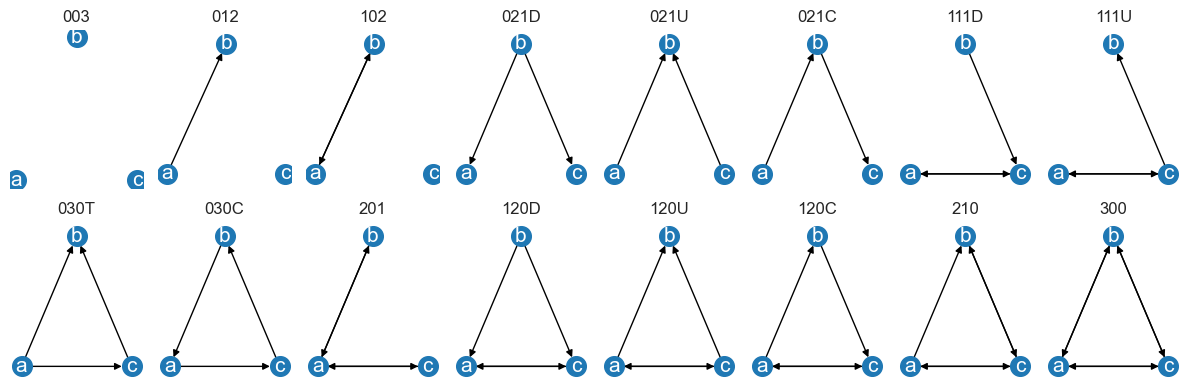

In [27]:
nColumns=8;
fig, axs = plt.subplots(int(np.ceil(len(nx.algorithms.triads.TRIAD_NAMES)/nColumns)), nColumns, figsize=(12,4))

for i,k in enumerate(list(nx.algorithms.triads.TRIAD_NAMES)):
    ax = axs[i//nColumns, i%nColumns]
    ax.set_title(f'{k}');
    nx.draw(nx.triad_graph(k), pos={'a':[0,0],'c':[10,0],'b':[5,10*np.sqrt(3)/2]},
            node_size=200, font_size=15,font_color='white', with_labels=True,ax=ax);

ax.set_facecolor('#cccccc');
plt.tight_layout();

In [28]:
nx.triadic_census(G_19) # En la red total

{'003': 2035,
 '012': 2115,
 '102': 365,
 '021D': 135,
 '021U': 2230,
 '021C': 285,
 '111D': 1065,
 '111U': 75,
 '030T': 689,
 '030C': 13,
 '201': 82,
 '120D': 890,
 '120U': 86,
 '120C': 122,
 '210': 325,
 '300': 148}

In [29]:
nx.triadic_census(Gedges_19) # en la red con el porcentaje seleccionado

{'003': 6302,
 '012': 1620,
 '102': 189,
 '021D': 19,
 '021U': 200,
 '021C': 30,
 '111D': 48,
 '111U': 1,
 '030T': 15,
 '030C': 0,
 '201': 2,
 '120D': 6,
 '120U': 4,
 '120C': 0,
 '210': 0,
 '300': 0}

**Kaggle**

In [30]:
def createTriac(df,topN, funcTop=selectTopN):
    temp = df.groupby(['countryfrom','countryto']).agg({'points':'sum'})\
    .reset_index().rename(columns={'points':'weight'})\
    .groupby(['countryfrom']).apply(funcTop,'weight',topN).reset_index(drop=True)

    g = nx.from_pandas_edgelist(temp,'countryfrom','countryto',['weight'], create_using=nx.DiGraph)
    return nx.triadic_census(g);

In [31]:
#selecting only relevant votes from most points to less point as connections
display(HTML("How chosing top N most voted countries as edges can affect the network"));
triads = pd.DataFrame([
    {'triad':c[0], 'count':c[1], 'topn':n}
    for n in [1,2,3,4,5,7,10,15,20,25,30,35,41,45]
    for c in createTriac(df2, n).items()
]).pivot_table(index='triad',columns='topn', values='count')
triads.reindex(index=list(nx.algorithms.triads.TRIAD_NAMES)).style.background_gradient()

In [32]:
display(HTML("How chosing top N percent of votes countries as edges can affect the network"))
triads = pd.DataFrame([
    {'triad':c[0], 'count':c[1], 'percent':int(n*100)}
    for n in np.linspace(0,1,21)
    for c in createTriac(df2, n, selectTopPercent).items()
]).pivot_table(index='triad',columns='percent', values='count')
triads.reindex(index=list(nx.algorithms.triads.TRIAD_NAMES)).style.background_gradient()

### 2. Label Propagation (Propagación de Etiquetas)
* Asigna etiquetas aleatorias a los nodos.
* Elige la etiqueta más común en el vecindario de cada nodo.
* Este método tiende a agrupar nodos en comunidades grandes.
* Es muy rápido pero no es la mejor opción para grafos altamente densos.

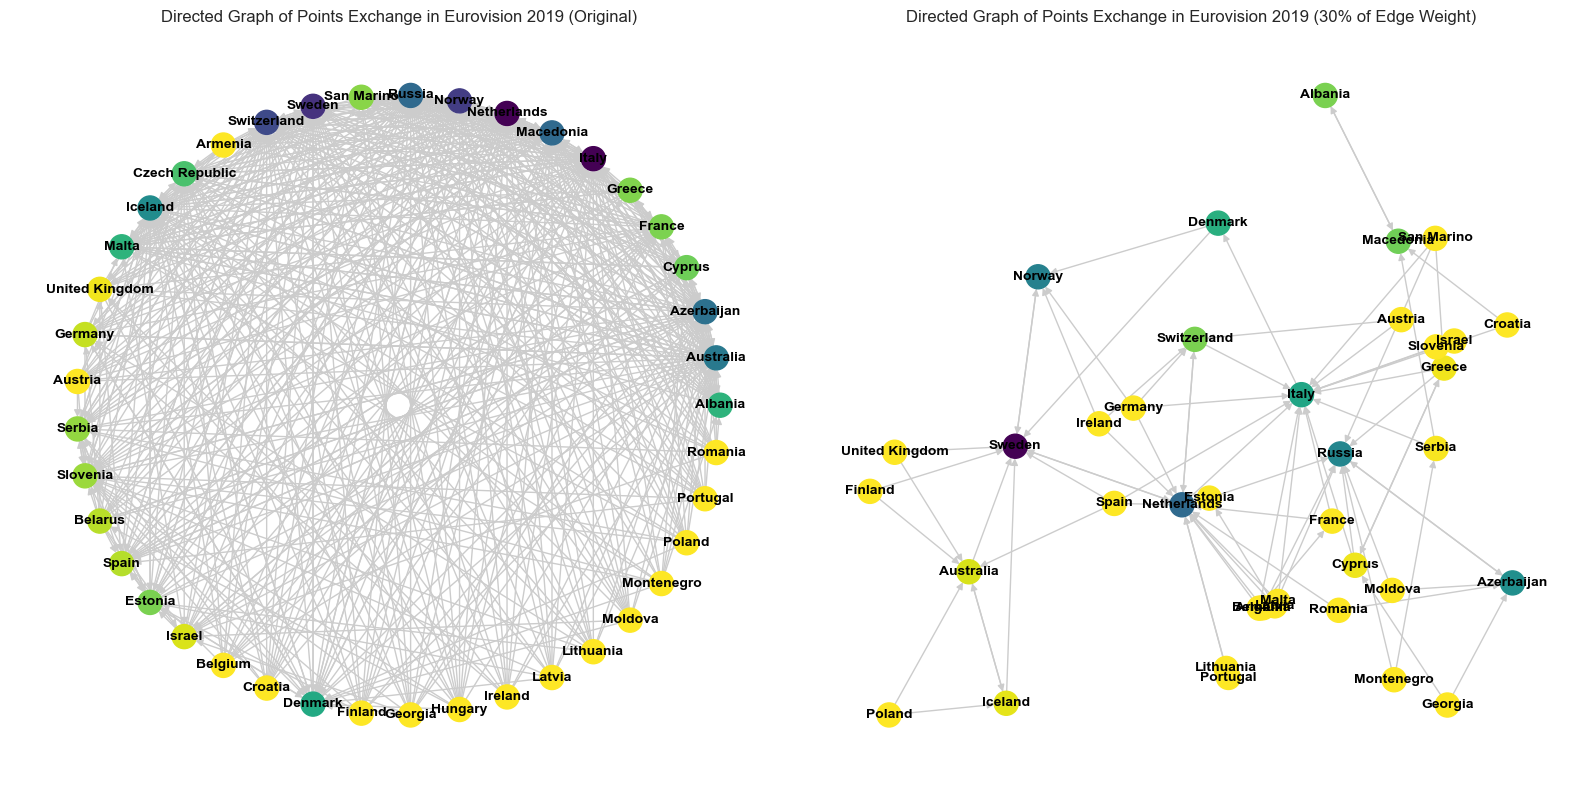

(            year final     countryfrom    countryto  weight
 15492 2019-01-01     f         Albania    Australia       2
 15493 2019-01-01     f         Albania   Azerbaijan      11
 15494 2019-01-01     f         Albania       Cyprus       7
 15495 2019-01-01     f         Albania       France       3
 15496 2019-01-01     f         Albania       Greece       6
 ...          ...   ...             ...          ...     ...
 16023 2019-01-01     f  United Kingdom       Norway      12
 16024 2019-01-01     f  United Kingdom       Russia       4
 16025 2019-01-01     f  United Kingdom        Spain       2
 16026 2019-01-01     f  United Kingdom       Sweden      15
 16027 2019-01-01     f  United Kingdom  Switzerland      12
 
 [536 rows x 5 columns],
             year final     countryfrom    countryto  weight
 15588 2019-01-01     f         Croatia        Italy      24
 15958 2019-01-01     f          Serbia    Macedonia      24
 15553 2019-01-01     f      Azerbaijan       Russia      

In [36]:
plot_eurovision_graph(df2, 2019, percent=0.3)  

In [37]:
# Paquetes y librerias
import random
from collections import Counter

**Nota Sofía:** Idea de los apuntes. Contar los patrones de una red aleatoria con el mismo número de nodos y enlaces y comparar

In [116]:
# Contamos el numero de patrones 3 motif
patrones_red = nx.triadic_census(Gedges_19) # en la red con el porcentaje seleccionado

def calcular_z_valor(patrones_red, num_redes):
    # Lista para almacenar los resultados de cada patron
    resultados_por_patron = {}
    
    # Generar redes aleatorias y contar patrones para cada una
    for _ in range(num_redes):
        red_aleatoria = nx.gnm_random_graph(Gedges_19.number_of_nodes(), Gedges_19.number_of_edges(), directed=True)
        patrones_red_aleatoria = nx.triadic_census(red_aleatoria)
        
        # Almacear para cada patron
        for patron, num_patrones in patrones_red_aleatoria.items():
            if patron not in resultados_por_patron:
                resultados_por_patron[patron] = []
            resultados_por_patron[patron].append(num_patrones)
            
    # Media y sd.
    media = {clave: [] for clave in resultados_por_patron.keys()}
    st = {clave: [] for clave in resultados_por_patron.keys()}
    
    for patron, result in resultados_por_patron.items():
        media[patron] = np.mean(result)
        st[patron] = np.std(result)
        
    # Valor Z
    valores_Z = {clave: [] for clave in patrones_red.keys()}
    for patron, num_patrones in patrones_red.items():
        if st[patron] != 0:
            val = (num_patrones - media[patron])/st[patron]
        else:
            val = float('inf')
            
        valores_Z[patron] = val
        
    return valores_Z

In [117]:
calcular_z_valor(patrones_red, 100)

{'003': 6.199704653619391,
 '012': -6.0768066621441275,
 '102': 3.4756188410868467,
 '021D': -5.183792034895573,
 '021U': 16.666919265699455,
 '021C': -6.686404082858427,
 '111D': 9.625016147478473,
 '111U': -0.994211300746559,
 '030T': 3.439972869970835,
 '030C': -1.7038969489307667,
 '201': 2.713602101199873,
 '120D': 15.002046453041972,
 '120U': 9.637960070171202,
 '120C': -0.48038446141526137,
 '210': inf,
 '300': inf}

In [ ]:
def label_propagation(graph):
    # Inicializar las etiquetas de los nodos con identificadores únicos
    for node in graph.nodes():
        graph.nodes[node]['label'] = node
    
    while True:
        # Mezclar los nodos para que el orden de actualización sea aleatorio
        nodes = list(graph.nodes())
        random.shuffle(nodes)
        
        # Actualizar las etiquetas de los nodos
        for node in nodes:
            # Obtener las etiquetas de los vecinos del nodo
            neighbor_labels = [graph.nodes[neighbor]['label'] for neighbor in graph.neighbors(node)]
            
            # Contar las apariciones de cada etiqueta
            label_counts = Counter(neighbor_labels)
            
            # Elegir la etiqueta más común
            most_common_label = label_counts.most_common(1)[0][0]
            
            # Actualizar la etiqueta del nodo
            graph.nodes[node]['label'] = most_common_label
        
        # Verificar si todas las etiquetas permanecen iguales
        if all(graph.nodes[node]['label'] == graph.nodes[list(graph.neighbors(node))[0]]['label'] for node in graph.nodes()):
            break
    
    # Devolver un diccionario con los nodos y sus etiquetas
    return {node: graph.nodes[node]['label'] for node in graph.nodes()}

In [ ]:
# Propagación de etiquetas
labels = label_propagation(Gedges_19)
print(labels)

## 3. Louvain Modularity (Modularidad de Louvain)
* Asigna nodos a clústeres de manera exhaustiva para maximizar la cantidad de enlaces dentro de cada clúster.
* Produce buenos clústeres y es muy eficiente.
* Es útil para grafos de tamaño mediano a grande.

In [ ]:
# Paquetes y librerias
from networkx.algorithms import community

In [ ]:
def louvain_modularity(graph):
    # Ejecutar el algoritmo de Louvain Modularity
    communities_generator = community.greedy_modularity_communities(graph)
    
    # Convertir el resultado en una lista de clústeres
    communities = [list(community) for community in communities_generator]
    
    return communities

In [ ]:
# Louvain Modularidad
result = louvain_modularity(Gedges_19)
print(result)

## 4. Spectral (Espectral)
* Realiza un Kmeans de la incrustación espectral (vectores y valores propios) de la matriz de Laplacian.
* Está relacionado con los cortes de grafo y es efectivo para detectar comunidades bien definidas.
* Puede ser más costoso computacionalmente que otros métodos, pero puede proporcionar resultados precisos.

In [ ]:
# Paquetes y librerias
from sklearn.cluster import KMeans

In [ ]:
def spectral_clustering(graph, num_clusters):
    # Obtener la matriz de Laplacian del grafo
    laplacian_matrix = nx.laplacian_matrix(graph)
    
    # Calcular los vectores y valores propios de la matriz de Laplacian
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix.toarray())
    
    # Seleccionar los vectores propios correspondientes a los k valores propios más pequeños
    k_smallest_indices = np.argsort(eigenvalues)[:num_clusters]
    selected_eigenvectors = eigenvectors[:, k_smallest_indices]
    
    # Ejecutar KMeans en los vectores propios seleccionados
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(selected_eigenvectors)
    
    # Asignar nodos a los clústeres detectados por KMeans
    clusters = {}
    for node, label in zip(graph.nodes(), kmeans.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(node)
    
    return list(clusters.values())

In [ ]:
result = spectral_clustering(Gedges_19.to_undirected(), 3)
print(result)